In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import os
import folium
from folium.plugins import HeatMap
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

Load the dataset and view all lines

In [ ]:
csv = pd.read_csv(r"/content/global_traffic_accidents.csv")
accidents_df = pd.DataFrame(csv)
accidents_df

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving
...,...,...,...,...,...,...,...,...,...,...,...
9995,2d26c7e2,2023-01-10,18:41,"Paris, France",-41.344055,109.335620,Storm,Wet,3,10,Distracted Driving
9996,4d236cfd,2023-04-04,16:48,"São Paulo, Brazil",-60.765148,-10.432225,Storm,Dry,3,9,Weather Conditions
9997,1d32722f,2024-09-30,14:43,"Beijing, China",-11.161278,-72.164379,Snow,Under Construction,2,3,Weather Conditions
9998,64722572,2024-10-27,18:34,"Sydney, Australia",-17.153524,20.803006,Storm,Under Construction,4,3,Drunk Driving


Checking the states

In [ ]:
accidents_df.describe()

,Latitude,Longitude,Vehicles Involved,Casualties
count,10000.000000,10000.000000,10000.000000,10000.00000
mean,-0.543557,0.338573,2.999100,4.98820
std,51.917928,103.379168,1.408935,3.13015
min,-89.985688,-179.961984,1.000000,0.00000
25%,-45.426619,-88.231733,2.000000,2.00000
50%,-1.080556,-0.682727,3.000000,5.00000
75%,44.137309,89.973059,4.000000,8.00000
max,89.990081,179.981695,5.000000,10.00000


Checking the column Dtypes

In [ ]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident ID        10000 non-null  object 
 1   Date               10000 non-null  object 
 2   Time               10000 non-null  object 
 3   Location           10000 non-null  object 
 4   Latitude           10000 non-null  float64
 5   Longitude          10000 non-null  float64
 6   Weather Condition  10000 non-null  object 
 7   Road Condition     10000 non-null  object 
 8   Vehicles Involved  10000 non-null  int64  
 9   Casualties         10000 non-null  int64  
 10  Cause              10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


Checking the null values

In [ ]:
accidents_df.isnull().sum()

,0
Accident ID,0
Date,0
Time,0
Location,0
Latitude,0
Longitude,0
Weather Condition,0
Road Condition,0
Vehicles Involved,0
Casualties,0


Weather Condition counts

In [ ]:
accidents_df['Weather Condition'].value_counts()

,count
Weather Condition,
Rain,1681
Clear,1674
Hail,1673
Snow,1667
Fog,1660
Storm,1645


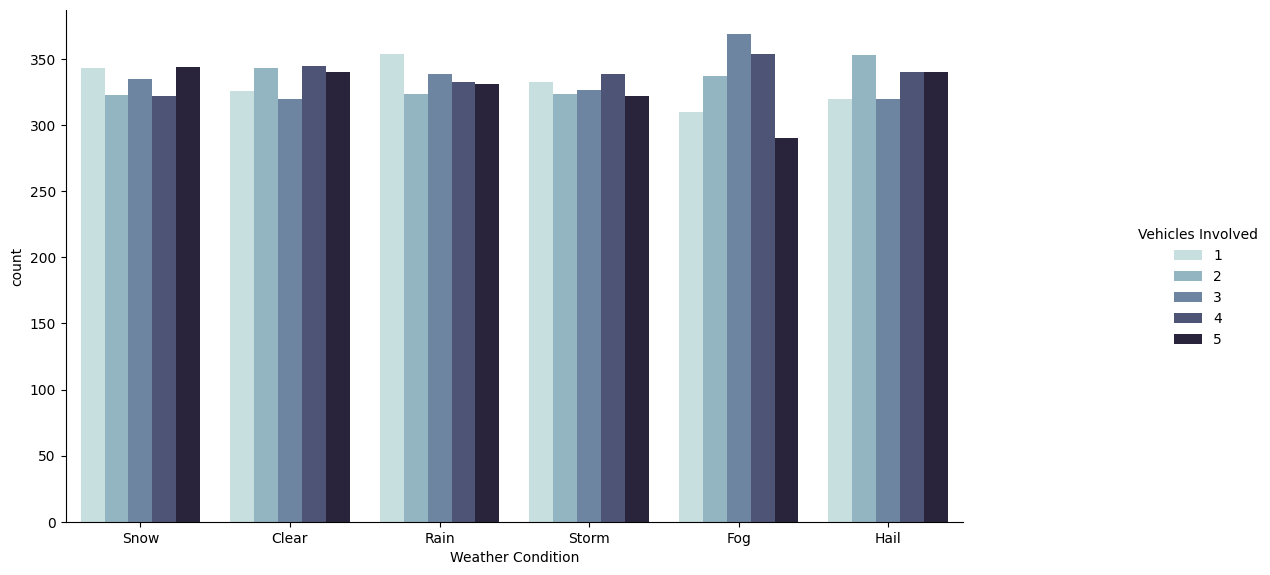

In [ ]:
plot = sns.catplot(accidents_df, x='Weather Condition', hue="Vehicles Involved", kind='count', palette="ch:start=.2,rot=-.3")
plot.figure.set_size_inches(14,6)
plot.set_titles("Count of accidents ")

Quantity and distribution of accidents causes

In [ ]:
accidents_df.Cause.value_counts()

,count
Cause,
Drunk Driving,1716
Reckless Driving,1685
Weather Conditions,1657
Speeding,1656
Mechanical Failure,1653
Distracted Driving,1633


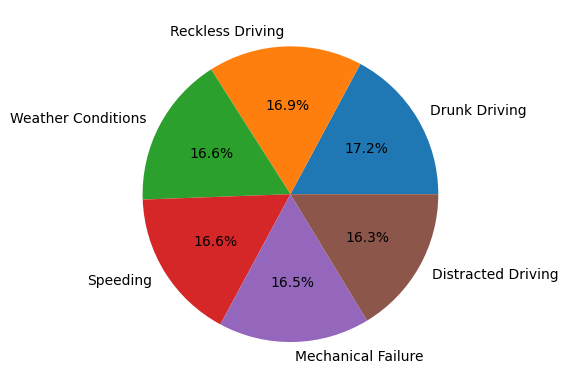

In [ ]:
fig, ax = plt.subplots()
ax.pie(accidents_df.Cause.value_counts(), labels=accidents_df.Cause.value_counts().index, autopct='%1.1f%%')
plt.show()

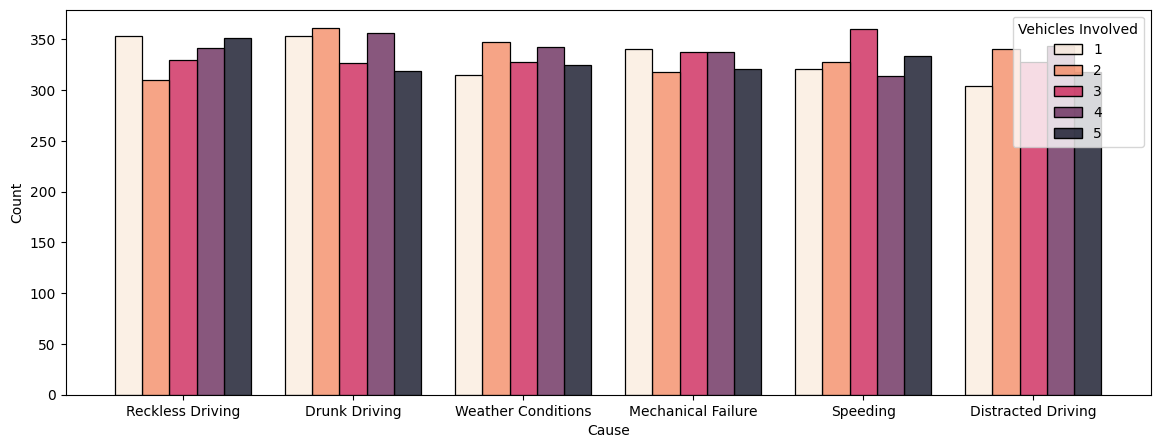

In [ ]:
plot = sns.histplot(accidents_df, x= "Cause", hue="Vehicles Involved", multiple="dodge", palette="rocket_r", shrink=.8)
plot.figure.set_size_inches(14,5)
plt.show()

Density of casualties per vehicles involvided

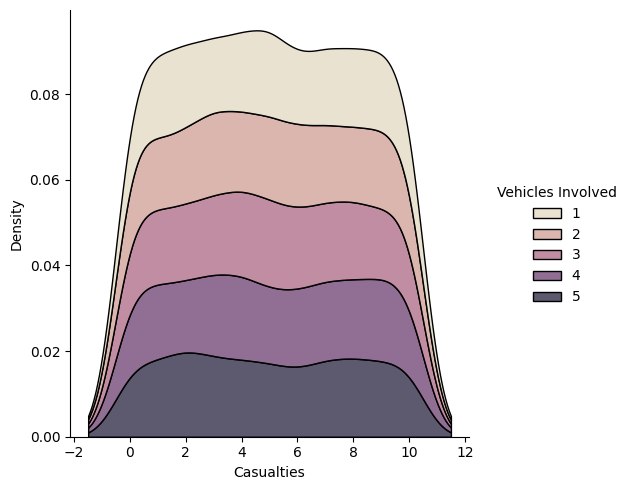

In [ ]:
plot = sns.displot(accidents_df, x= "Casualties", hue="Vehicles Involved", kind="kde", multiple="stack", palette="ch:s=-.2,r=.6")
plt.show()

Count of causes per weekday

In [ ]:
accidents_df['Date']= pd.to_datetime(accidents_df['Date'])
accidents_df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


In [ ]:
date_df = accidents_df.copy()
date_df['Month'] = date_df['Date'].dt.month
date_df['Day'] = date_df['Date'].dt.day
date_df['Year'] = date_df['Date'].dt.year

In [ ]:
date_df["Weekday"] = date_df.apply(lambda row: datetime(row["Year"], row["Month"], row["Day"]).strftime('%A'), axis=1)
date_df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause,Month,Day,Year,Weekday
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving,4,19,2023,Wednesday
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving,1,17,2023,Tuesday
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving,4,9,2024,Tuesday
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving,10,10,2023,Tuesday
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving,1,2,2023,Monday


In [ ]:
orderedDays = pd.CategoricalDtype(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
date_df["Weekday"] = date_df["Weekday"].astype(orderedDays)

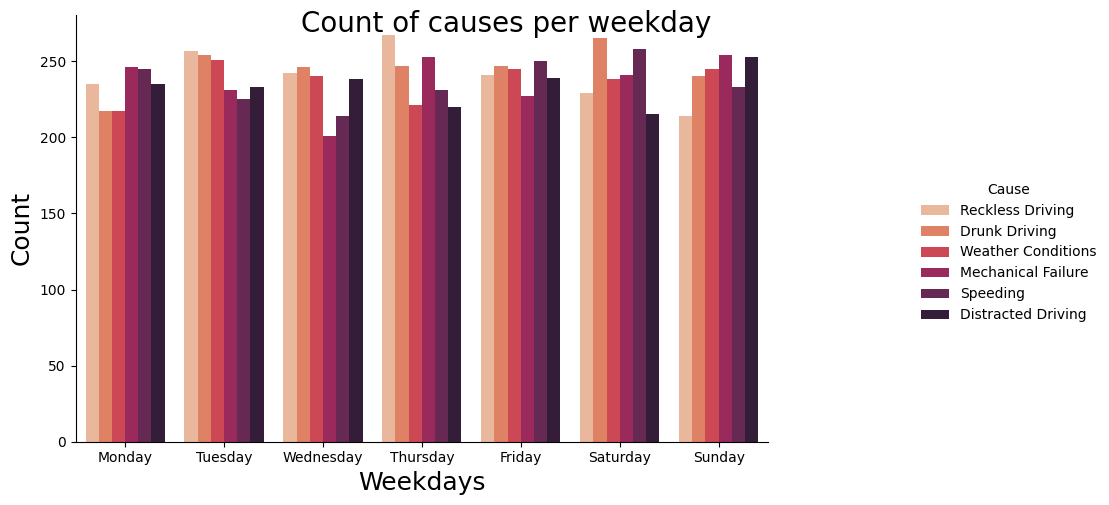

In [ ]:
plot = sns.catplot(data=date_df,
                   x="Weekday",
                   hue="Cause",
                   kind="count",
                   palette="rocket_r",)
plot.figure.set_size_inches(12,5)
plot.fig.suptitle('Count of causes per weekday', fontsize=20)
plot.set_axis_labels("Weekdays", "Count", fontsize=18)
plt.show()

Correlation between Weekdays and Causes

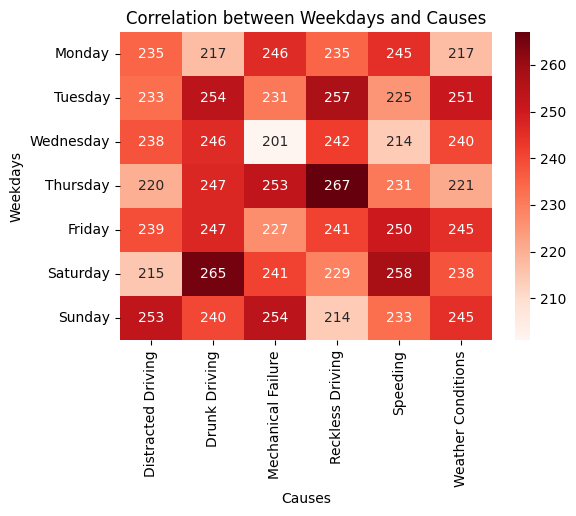

In [ ]:
correlation = pd.crosstab(date_df.Weekday, date_df.Cause)
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap="Reds", fmt="d")
plt.title("Correlation between Weekdays and Causes")
plt.ylabel("Weekdays")
plt.xlabel("Causes")
plt.show()

Accidents per location

In [ ]:
accidents_df['Location'].value_counts()

,count
Location,
"São Paulo, Brazil",1032
"New York, USA",1016
"Beijing, China",1014
"Sydney, Australia",1006
"Toronto, Canada",1003
"London, UK",1000
"Paris, France",995
"Tokyo, Japan",989
"Mumbai, India",987


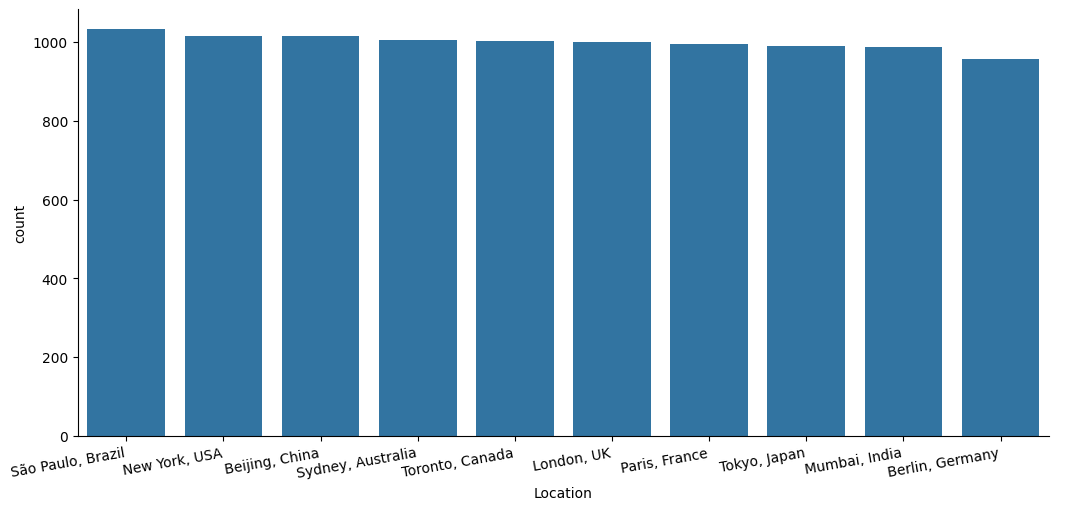

In [ ]:
plot = sns.catplot(accidents_df,
                   x='Location',
                   kind='count',
                   order=accidents_df.Location.value_counts().index)
plot.figure.set_size_inches(12,5)
plot.set_xticklabels(rotation=10, ha='right')
plt.show()

Mapping all accidents in "São Paulo, Brazil"
       

Note: None of points are in São Paulo

In [ ]:
sp_df = accidents_df.loc[accidents_df['Location'] == 'São Paulo, Brazil', ['Location', 'Latitude', 'Longitude']].reset_index(drop=True)
sp_df

,Location,Latitude,Longitude
0,"São Paulo, Brazil",-37.798317,-32.244242
1,"São Paulo, Brazil",-39.332739,0.991049
2,"São Paulo, Brazil",51.568285,-22.209768
3,"São Paulo, Brazil",0.520167,-170.052320
4,"São Paulo, Brazil",-37.075082,-3.632071
...,...,...,...
1027,"São Paulo, Brazil",-46.378740,4.294878
1028,"São Paulo, Brazil",83.481857,-83.701844
1029,"São Paulo, Brazil",-37.784977,-123.903311
1030,"São Paulo, Brazil",17.673898,-53.073675


In [ ]:
map = folium.Map()
HeatMap(sp_df[['Latitude', 'Longitude']].values.tolist()).add_to(map)
map